In [114]:
import numpy as np 
  
# data processing
import pandas as pd
  
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [63]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [64]:
#To check for null values

In [65]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [66]:
#No null values

In [67]:
#Visualisation To cherck for missing values

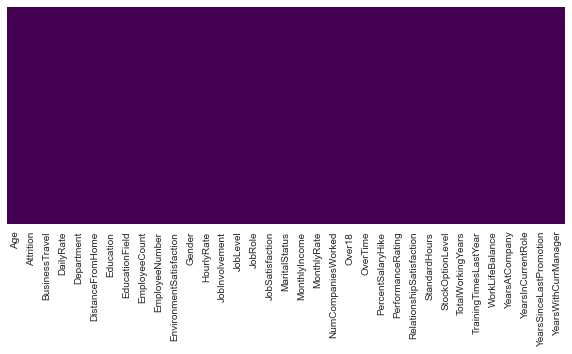

In [68]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [69]:
#No missing values

In [70]:
#Target variable here is attrition and les visualise the data for it 

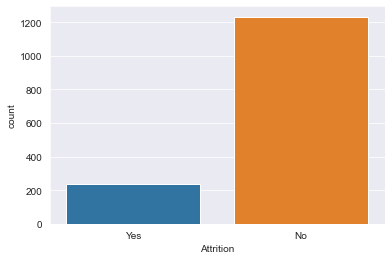

In [71]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

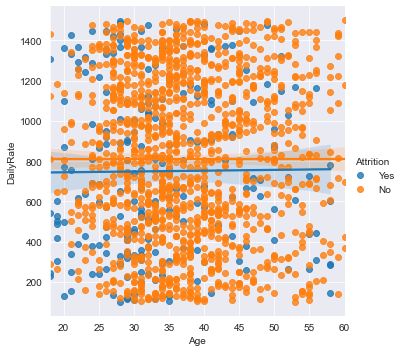

In [72]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df) 

In [73]:
#Data preprocessing
#Checking on different features against Attrition

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [75]:
Value = {"Yes": 1, "No": 0}
data = [df]

for dataset in data:
    dataset['Attrition'] = dataset['Attrition'].map(Value)

In [76]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [77]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [78]:
Value = {"Travel_Rarely": 1, "Travel_Frequently": 2,"Non-Travel":3}
data = [df]

for dataset in data:
    dataset['BusinessTravel'] = dataset['BusinessTravel'].map(Value)

In [79]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [80]:
Value = {"Sales": 1, "Research & Development": 2,"Human Resources":3}
data = [df]

for dataset in data:
    dataset['Department'] = dataset['Department'].map(Value)

In [81]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [82]:
Value = {"Life Sciences": 1, "Other": 2,"Medical":3,"Marketing":4,"Technical Degree":5,"Human Resources":6}
data = [df]

for dataset in data:
    dataset['EducationField'] = dataset['EducationField'].map(Value)

In [83]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [84]:
Value = {"Male": 1, "Female": 2}
data = [df]

for dataset in data:
    dataset['Gender'] = dataset['Gender'].map(Value)

In [85]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [86]:
Value = {"Sales Executive": 1, "Research Scientist": 2,"Laboratory Technician":3,"Manufacturing Director":4,"Healthcare Representative":5,"Manager":6,"Sales Representative":7,"Research Director":8,"Human Resources":9}
data = [df]

for dataset in data:
    dataset['JobRole'] = dataset['JobRole'].map(Value)

In [87]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [88]:
Value = {"Single": 1, "Married": 2,"Divorced":3}
data = [df]

for dataset in data:
    dataset['MaritalStatus'] = dataset['MaritalStatus'].map(Value)

In [89]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [90]:
#Since this is a constant value and wont be used for analysis .I will drop it 

In [91]:
df = df.drop(['Over18'], axis=1)

In [92]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [93]:
Value = {"Yes": 1, "No": 2}
data = [df]

for dataset in data:
    dataset['OverTime'] = dataset['OverTime'].map(Value)

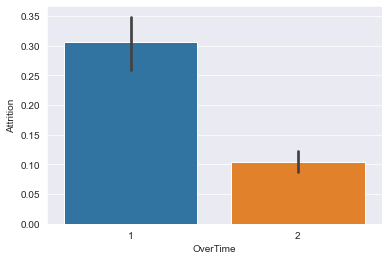

In [108]:
#Data Visualization

sns.barplot(x='OverTime', y='Attrition', data=df)

In [95]:
#Attrition is higher with overtime as yes

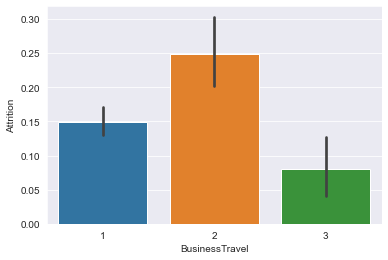

In [96]:
sns.barplot(x='BusinessTravel', y='Attrition', data=df)

In [97]:
#Attrition is higher among employees who travel frequently

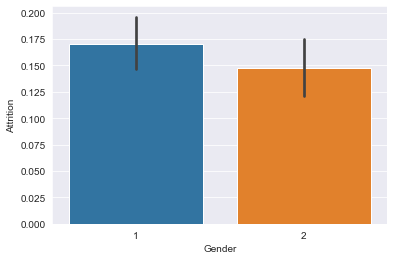

In [98]:
sns.barplot(x='Gender', y='Attrition', data=df)

In [99]:
#Attrition is higher among men 

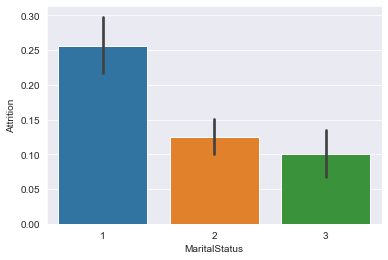

In [100]:
sns.barplot(x='MaritalStatus', y='Attrition', data=df)

In [101]:
#Attrition is higher in singles

In [59]:
#Correlation matrix
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.007192,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.000074,-0.056652,-0.063991,0.077924,-0.031373,0.075437,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.024751,-0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.017799,NaN,0.015578,...,0.035986,NaN,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,-0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.015942,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,-0.057499,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.020004,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,-0.002687,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.007192,0.075437,-0.017799,-0.015942,-0.057499,0.020004,-0.002687,1.000000,NaN,0.007922,...,0.022723,NaN,0.020179,-0.002329,0.014553,0.033896,0.003061,-0.007728,0.004327,-0.001829
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,0.015578,-0.050990,0.010895,0.032916,0.042070,0.007922,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [104]:
df = df.drop(['EmployeeCount'], axis=1)

KeyError: "['EmployeeCount'] not found in axis"

In [106]:
df = df.drop(['StandardHours'], axis=1)

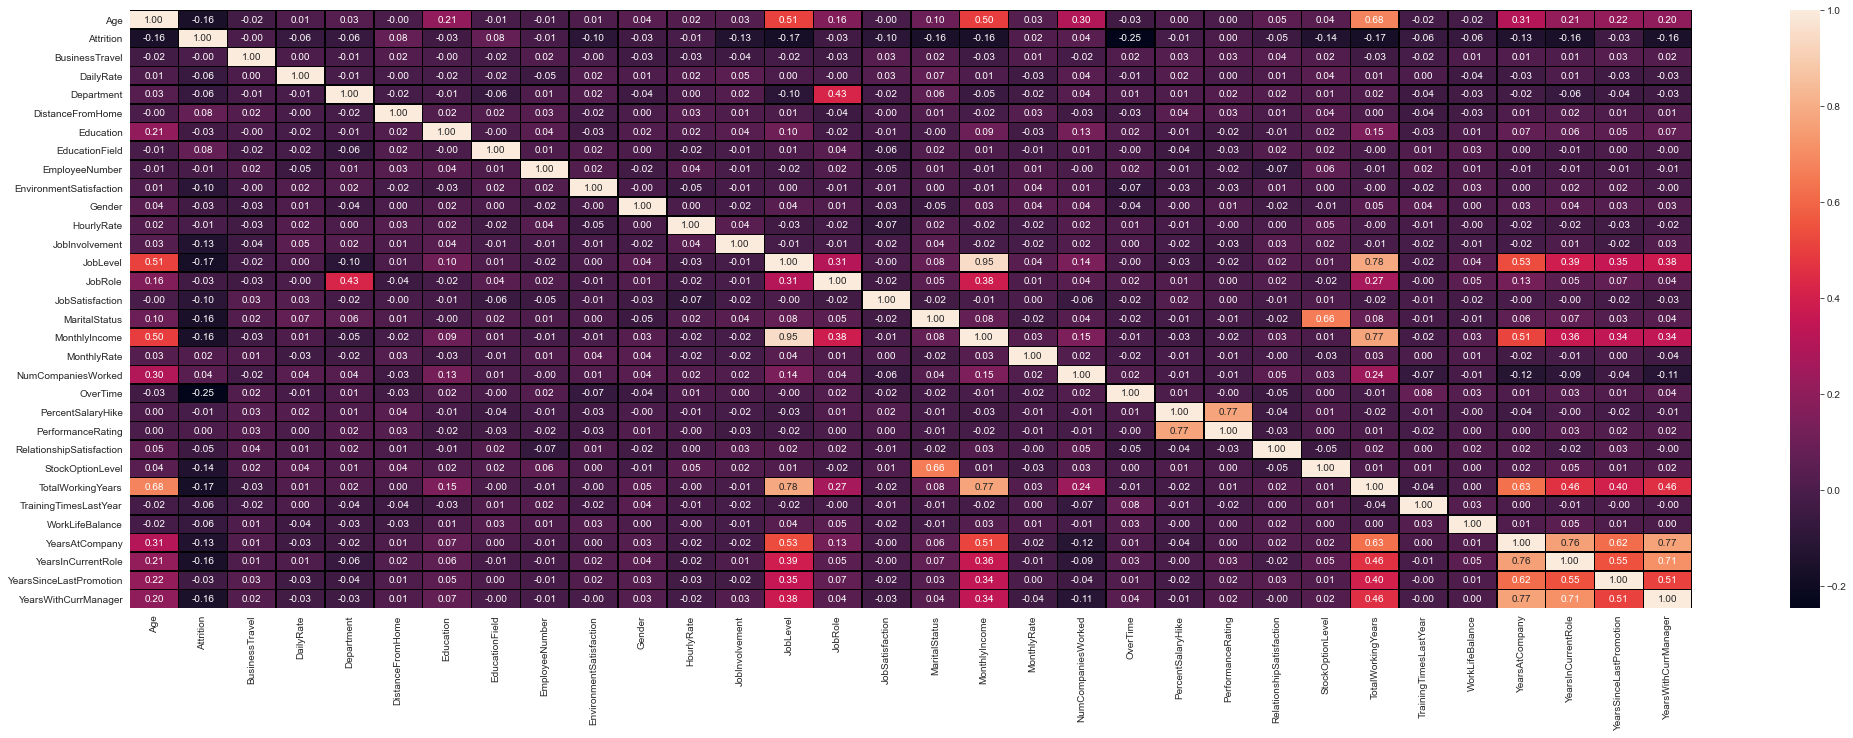

In [107]:
plt.figure(figsize=(35,11))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor="black",fmt='.2f')

In [109]:
#Building Models

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [115]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [116]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\TEMP.LAPTOP-4Q27H6SA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [118]:

#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [119]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [120]:

#Looping to find the best Model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
88.31,KNN
83.54,Logistic Regression
77.85,Naive Bayes


In [121]:
#As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [122]:
#K-fold cross validation

In [123]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86868687 0.86868687 0.84848485 0.82828283 0.83673469 0.85714286
 0.80612245 0.86734694 0.86734694 0.85714286]
Mean: 0.8505978148835291
Standard Deviation: 0.019934484553049713


In [124]:
#We have a accuracy of 85% and standard deviation around 2%

In [125]:
#Feature importance

In [126]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
MonthlyIncome,0.078
Age,0.062
OverTime,0.055
DailyRate,0.051
EmployeeNumber,0.051
TotalWorkingYears,0.048
DistanceFromHome,0.047
MonthlyRate,0.046
HourlyRate,0.040


In [127]:
#This shows us the deatures which are important

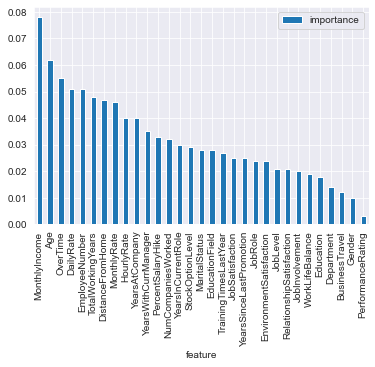

In [128]:
importances.plot.bar()

In [129]:
#Hyperparameter tuning

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]} from sklearn.model_selection import GridSearchCV, cross_val_score rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1) clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1) clf.fit(X_train, y_train) clf.bestparams

In [130]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 84.25 %


In [131]:
#Further evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[809,   8],
       [140,  27]], dtype=int64)

In [132]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7714285714285715
Recall: 0.16167664670658682


In [133]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.26732673267326734

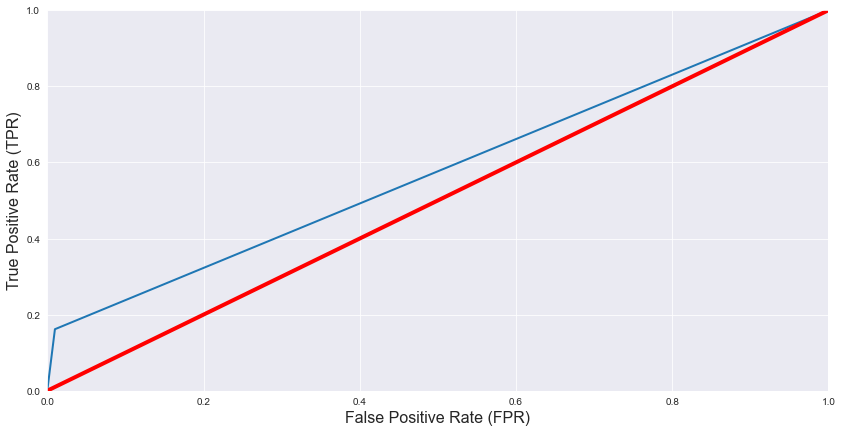

In [134]:

#ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predictions)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [135]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, predictions)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.5759423625209801


In [136]:
#Model Saving

import pickle
filename='HR_Analytics.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [137]:
#conclusion

In [138]:

a=np.array(y_test)
predicted=np.array(random_forest.predict(X_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,0,0
484,0,0


In [ ]:
#Key Findings (based on hypothetical dataset)
#The top factor for employee attrition in this hypothetical organisation seems to be monetary, as ‘OverTime’ and ‘MonthlyIncome’
#emerged at the top. 
#This could be due to a bad compensation process or causing a poor work-life balance. 
#The next important factor seems to be personal relationships with fellow workers, where current manager and job role could be the main contributing reasons for attrition. Finally, employee engagement is a critical satisfaction factor, and the organisation should keep employees constantly involved and motivated